In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score,roc_auc_score
import joblib
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [250]:
df=pd.read_csv('Loan_default.csv')

<Axes: >

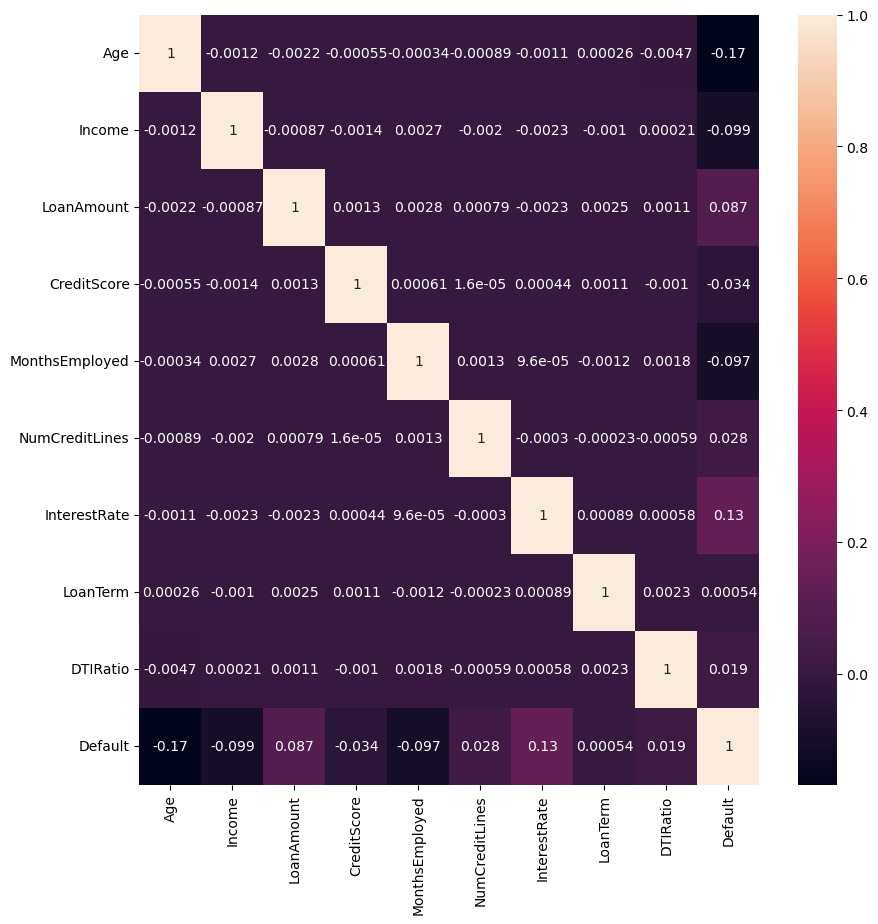

In [252]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

In [254]:
df=df.iloc[:,1:18] # removing the ID it is must ignor it , because it is not effective for define the default
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [256]:
df.duplicated().sum()

0

In [258]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

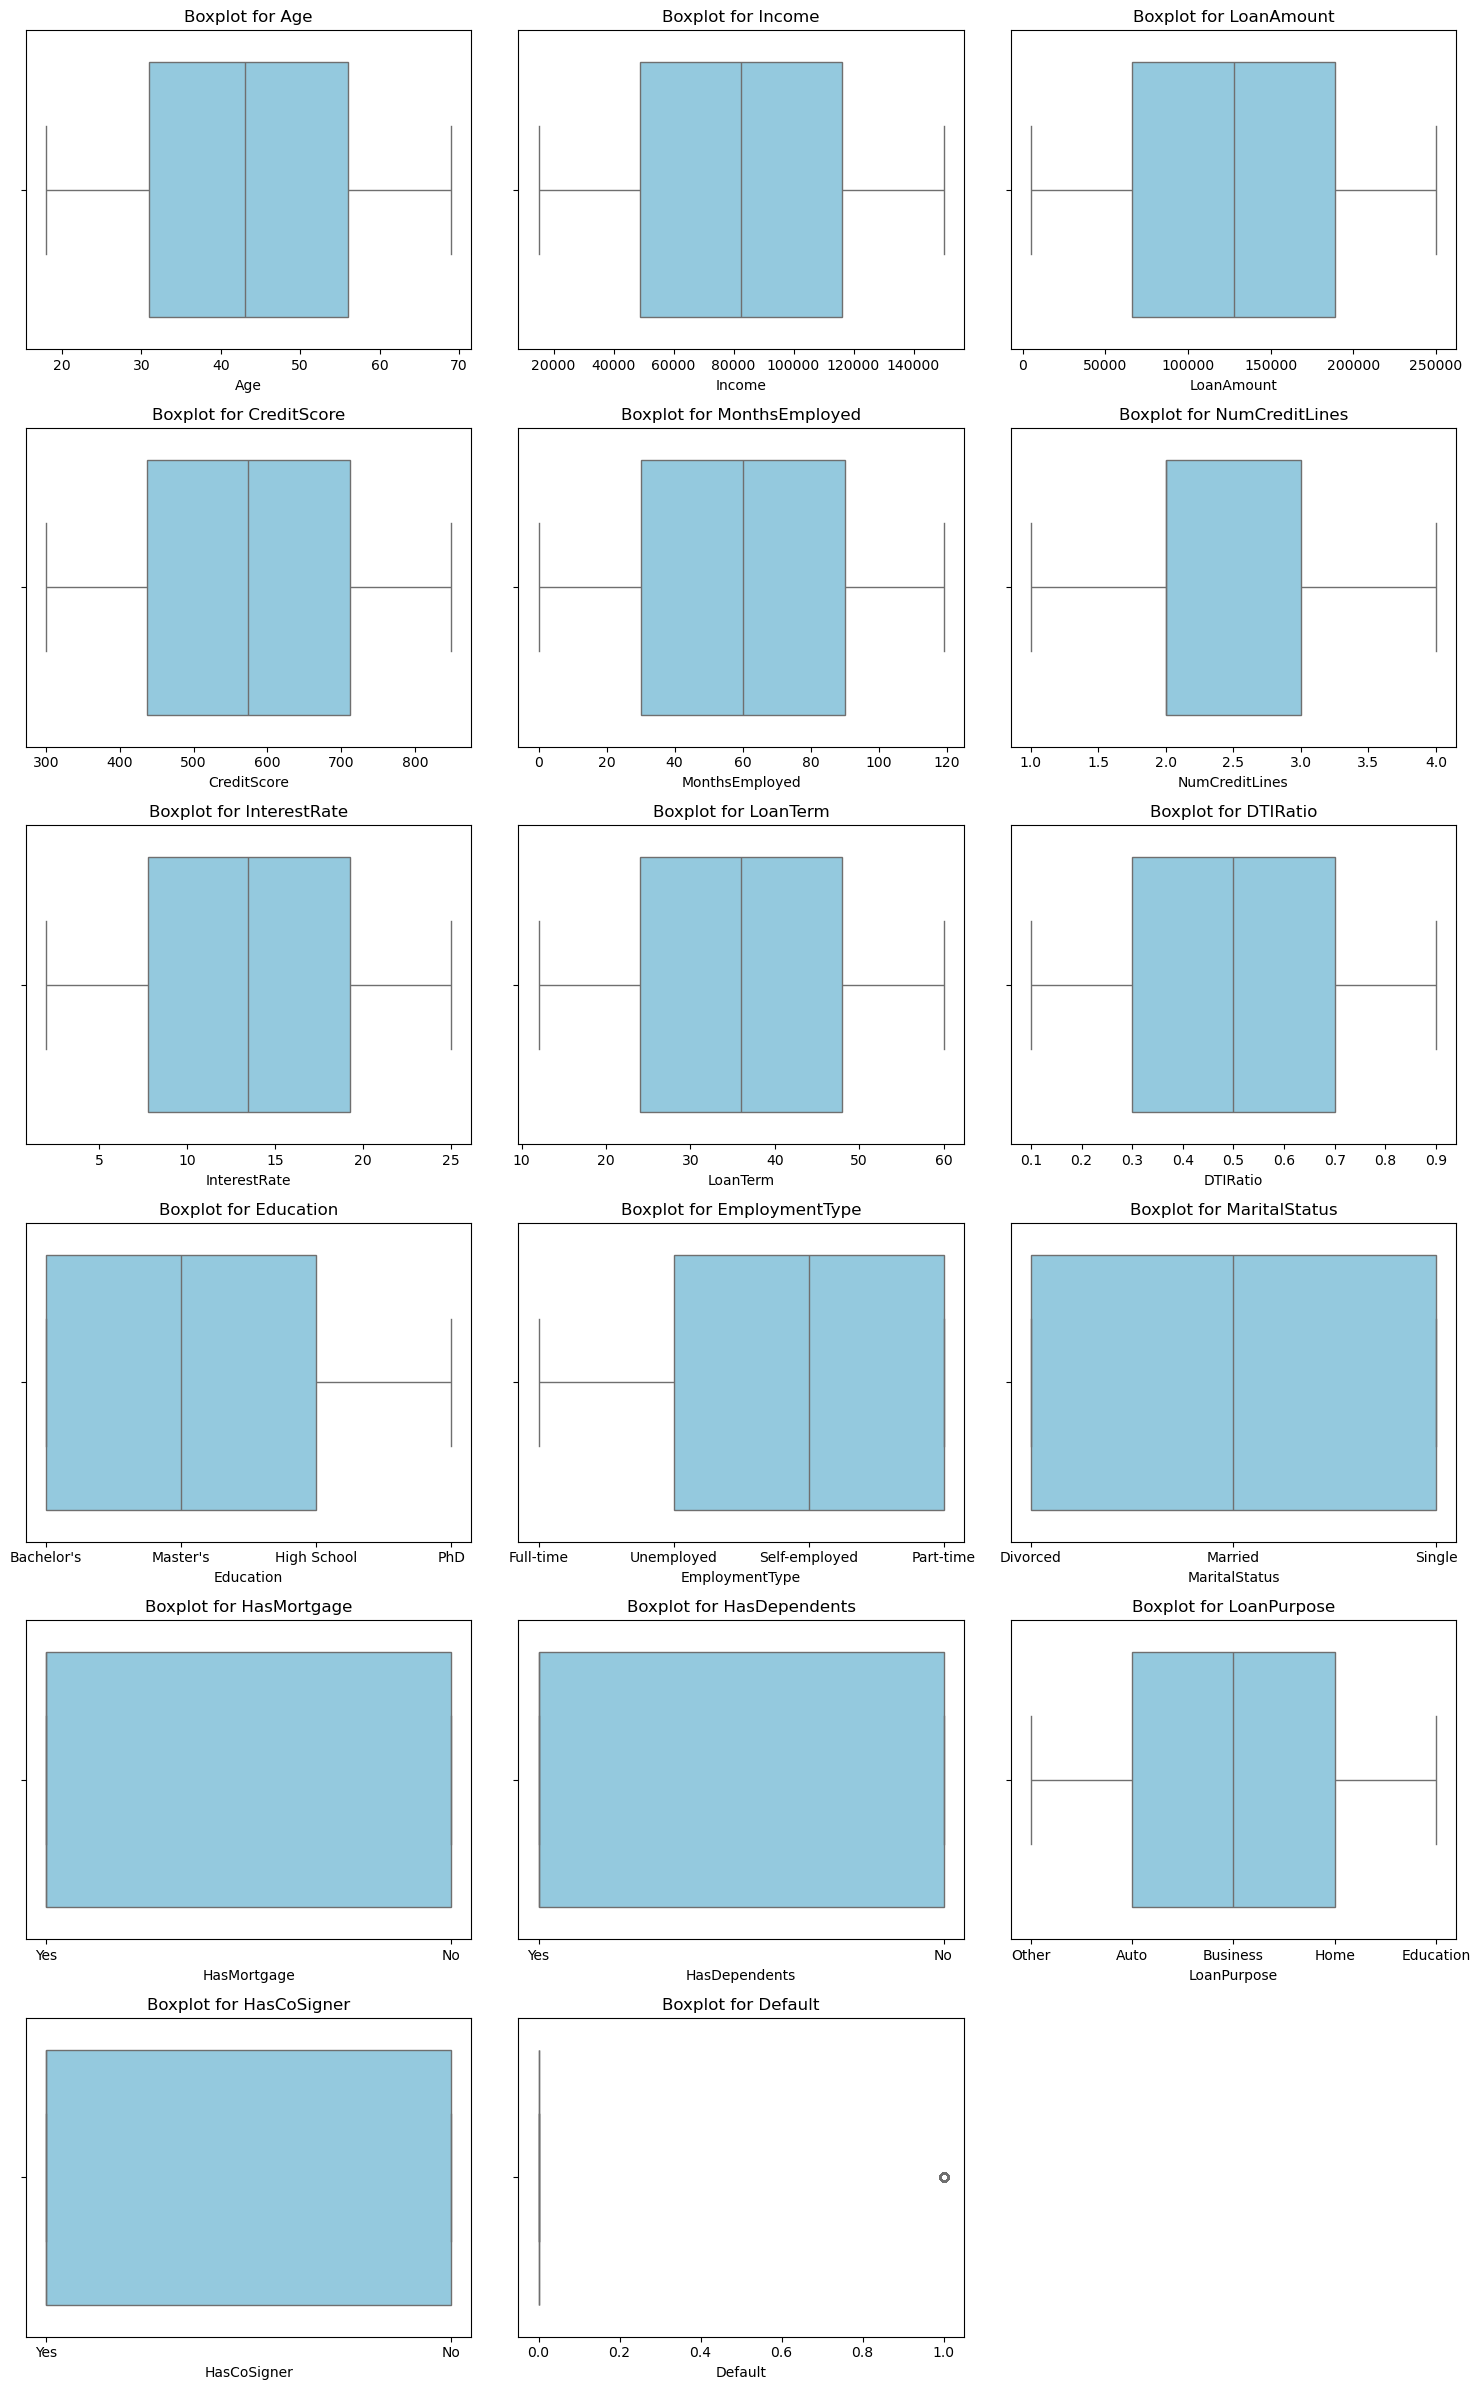

In [260]:
cols = df.columns
n = len(cols)

cols_per_row = 3
rows = math.ceil(n / cols_per_row)


fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [261]:
df['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [262]:
maping_of_education={'High School':0,"Bachelor's":1,"Master's":2,'PhD':3}
df['Education']=df['Education'].map(maping_of_education)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,Unemployed,Divorced,No,Yes,Auto,No,0


In [263]:
le = LabelEncoder()
df['HasMortgage']=le.fit_transform(df['HasMortgage'])
df['HasCoSigner']=le.fit_transform(df['HasCoSigner'])
df['HasDependents']=le.fit_transform(df['HasDependents'])
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,Unemployed,Divorced,0,1,Auto,0,0


In [264]:
maping_of_employment_type={'Unemployed':0,'Self-employed':1,'Part-time':2,'Full-time':3}
df['EmploymentType']=df['EmploymentType'].map(maping_of_employment_type)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,3,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,3,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,3,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,0,Divorced,0,1,Auto,0,0


In [265]:
maping_of_MaritalStatus={'Divorced':0,'Married':1,'Single':2}
df['MaritalStatus']=df['MaritalStatus'].map(maping_of_MaritalStatus)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,3,0,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,3,1,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,0,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,3,1,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,0,0,0,1,Auto,0,0


In [266]:
enconde_loan_purpose=pd.get_dummies(df['LoanPurpose'],drop_first=True,dtype=int)
df=pd.concat([df,enconde_loan_purpose],axis=1)
df.drop('LoanPurpose',axis=1,inplace=True)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,Default,Business,Education,Home,Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,3,0,1,1,1,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,3,1,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,0,1,1,0,1,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,3,1,0,0,0,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,0,0,0,1,0,0,0,0,0,0


<Axes: >

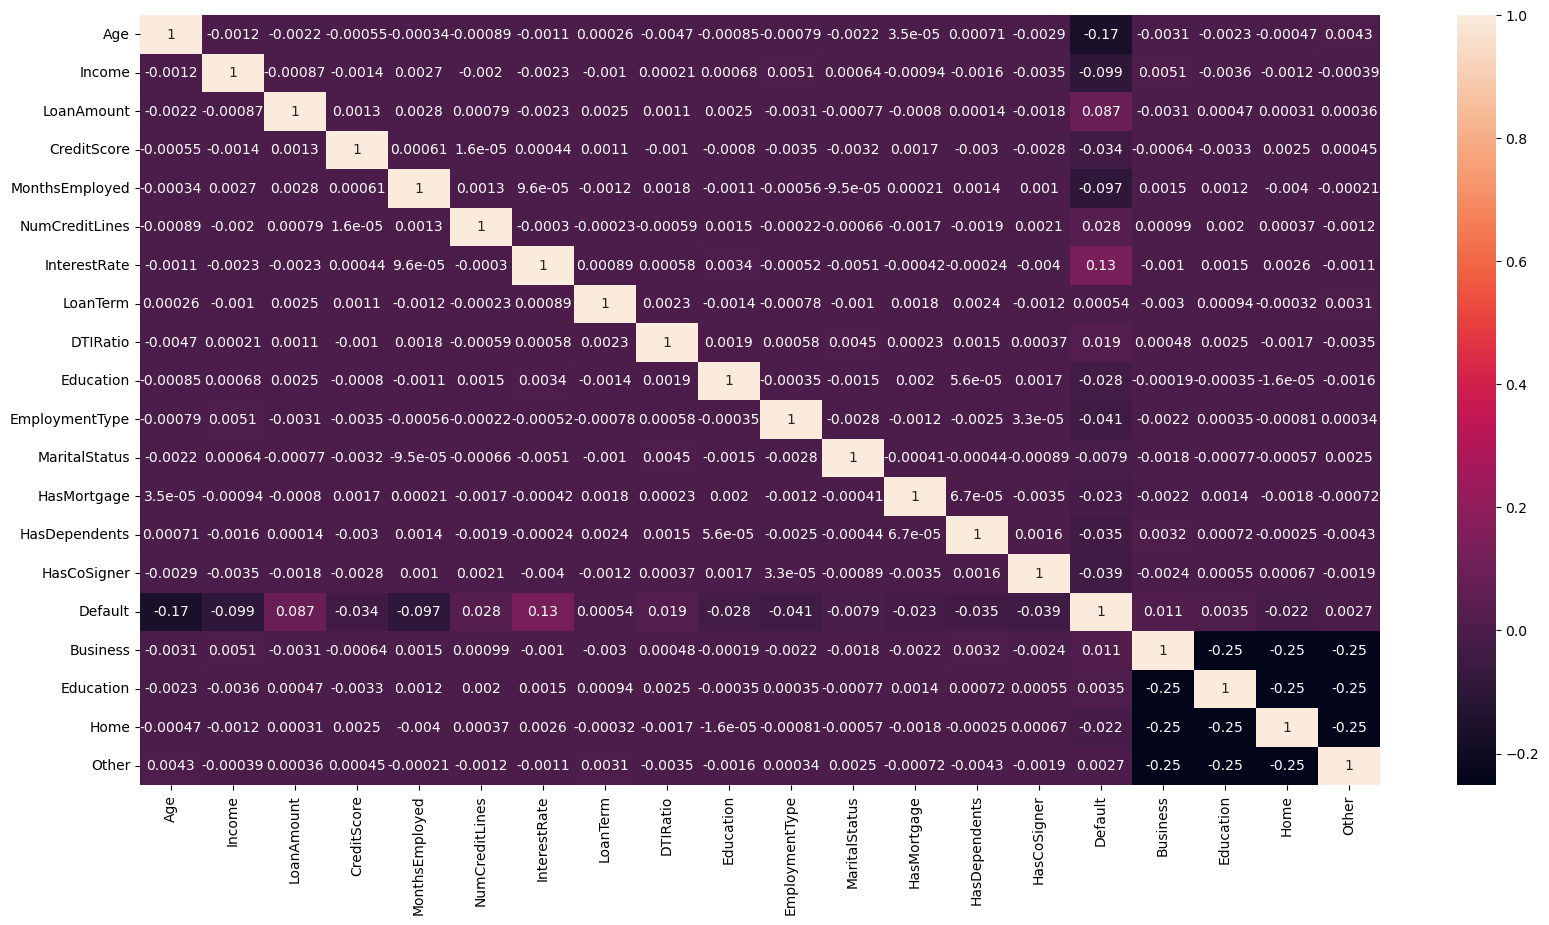

In [267]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [268]:
x=df.drop('Default',axis=1)
y=df['Default']

In [269]:
smk = SMOTETomek(random_state=42)
X_resampled, y_resampled = smk.fit_resample(x, y)

In [270]:
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 209553, 1: 209553})


In [271]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [272]:
pca=PCA(n_components=0.95)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [273]:
x_train_sample, _, y_train_sample, _ = train_test_split(x_train_pca, y_train, test_size=0.85, random_state=42)

In [274]:
param_grid_rf = {
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
rf = RandomForestClassifier(n_estimators=200,random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=1, verbose=2)
grid_rf.fit(x_train_sample, y_train_sample)

print("Best params:", grid_rf.best_params_)
print("CV accuracy:", grid_rf.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=  17.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=  17.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=  18.3s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=  17.7s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=  17.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=  17.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=  17.7s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=  

In [275]:
rf_model = RandomForestClassifier(n_estimators=200,random_state=42,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',criterion='entropy',max_depth=20)
rf_model.fit(x_train_pca, y_train)
y_pred = rf_model.predict(x_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8618859010760898


In [276]:
rf_pred_proba = rf_model.predict_proba(x_test_pca)[:, 1]

In [283]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

In [285]:
print("classification_report: \n",classification_report(y_test, y_pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86     42031
           1       0.88      0.84      0.86     41791

    accuracy                           0.86     83822
   macro avg       0.86      0.86      0.86     83822
weighted avg       0.86      0.86      0.86     83822



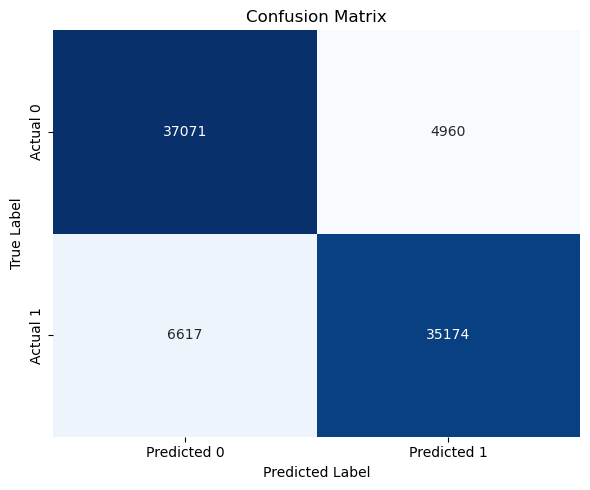

In [286]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [289]:
param_grid_xgb = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(x_train_sample, y_train_sample)

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', **grid_xgb.best_params_)
xgb_model.fit(x_train_pca, y_train)
xgb_pred = xgb_model.predict(x_test_pca)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [290]:
xgb_pred_proba = xgb_model.predict_proba(x_test_pca)[:, 1]

In [291]:
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_auc = roc_auc_score(y_test, xgb_pred_proba)

In [292]:
print("classification_report: \n",classification_report(y_test, xgb_pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     42031
           1       0.87      0.83      0.85     41791

    accuracy                           0.85     83822
   macro avg       0.86      0.85      0.85     83822
weighted avg       0.86      0.85      0.85     83822



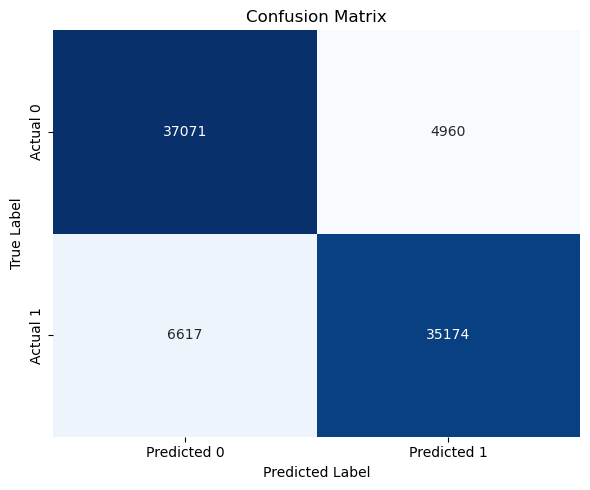

In [293]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [294]:
model_results = {}
model_precision = {}
model_recall = {}
model_f1 = {}
model_auc = {}

In [295]:
model_results['RandomForest'] = rf_accuracy
model_precision['RandomForest'] = rf_precision
model_recall['RandomForest'] = rf_recall
model_f1['RandomForest'] = rf_f1
model_auc['RandomForest'] = rf_auc
model_results['XGBoost'] = xgb_accuracy
model_precision['XGBoost'] = xgb_precision
model_recall['XGBoost'] = xgb_recall
model_f1['XGBoost'] = xgb_f1
model_auc['XGBoost'] = xgb_auc

In [296]:
print("\nTraining LightGBM...")
param_grid_lgb = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'num_leaves': [20, 31, 50]
}
lgb = LGBMClassifier(random_state=42, verbose=-1)
grid_lgb = GridSearchCV(lgb, param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lgb.fit(x_train_sample, y_train_sample)

lgb_model = LGBMClassifier(random_state=42, verbose=-1, **grid_lgb.best_params_)
lgb_model.fit(x_train_pca, y_train)
lgb_pred = lgb_model.predict(x_test_pca)
lgb_accuracy = accuracy_score(y_test, lgb_pred)
model_results['LightGBM'] = lgb_accuracy
print(f"LightGBM Accuracy: {lgb_accuracy:.4f}")


Training LightGBM...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
LightGBM Accuracy: 0.8574


In [297]:
lgb_pred_proba = lgb_model.predict_proba(x_test_pca)[:, 1]

In [298]:
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)
lgb_auc = roc_auc_score(y_test, lgb_pred_proba)
model_precision['LightGBM'] = lgb_precision
model_recall['LightGBM'] = lgb_recall
model_f1['LightGBM'] = lgb_f1
model_auc['LightGBM'] = lgb_auc

In [299]:
print("classification_report: \n",classification_report(y_test, lgb_pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     42031
           1       0.87      0.83      0.85     41791

    accuracy                           0.86     83822
   macro avg       0.86      0.86      0.86     83822
weighted avg       0.86      0.86      0.86     83822



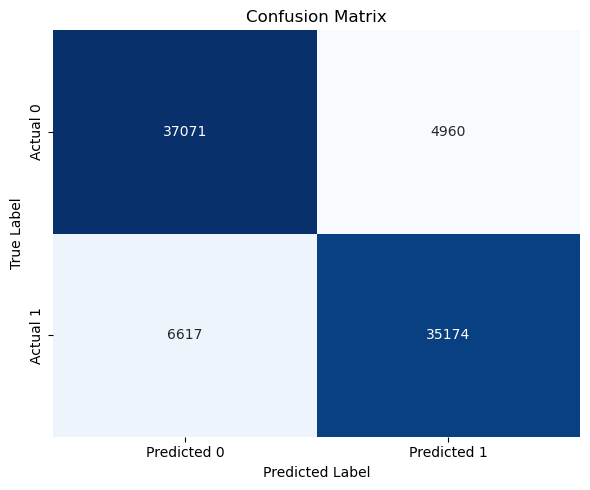

In [300]:
cm_lgb = confusion_matrix(y_test, lgb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [301]:
print("\nTraining Gradient Boosting...")
param_grid_gb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}
gb = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_gb.fit(x_train_sample, y_train_sample)

gb_model = GradientBoostingClassifier(random_state=42, **grid_gb.best_params_)
gb_model.fit(x_train_pca, y_train)
gb_pred = gb_model.predict(x_test_pca)
gb_accuracy = accuracy_score(y_test, gb_pred)


Training Gradient Boosting...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [302]:
gb_pred_proba = gb_model.predict_proba(x_test_pca)[:, 1]

In [303]:
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_auc = roc_auc_score(y_test, gb_pred_proba)
model_results['Gradient Boosting'] = gb_accuracy
model_precision['Gradient Boosting'] = gb_precision
model_recall['Gradient Boosting'] = gb_recall
model_f1['Gradient Boosting'] = gb_f1
model_auc['Gradient Boosting'] = gb_auc

In [304]:
print("classification_report: \n",classification_report(y_test, gb_pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     42031
           1       0.87      0.83      0.85     41791

    accuracy                           0.86     83822
   macro avg       0.86      0.86      0.86     83822
weighted avg       0.86      0.86      0.86     83822



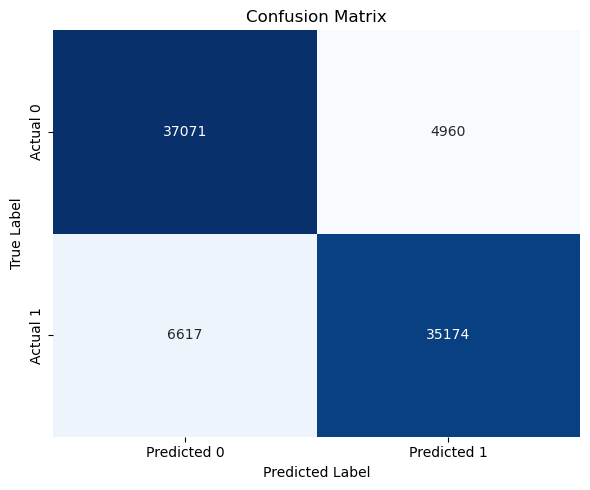

In [305]:
cm_gb = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [306]:
# 5. AdaBoost
print("\nTraining AdaBoost...")
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}
ada = AdaBoostClassifier(random_state=42)
grid_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_ada.fit(x_train_sample, y_train_sample)

ada_model = AdaBoostClassifier(random_state=42, **grid_ada.best_params_)
ada_model.fit(x_train_pca, y_train)
ada_pred = ada_model.predict(x_test_pca)
ada_accuracy = accuracy_score(y_test, ada_pred)
model_results['AdaBoost'] = ada_accuracy
print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")


Training AdaBoost...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/binaypandey/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/binaypandey/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/binaypandey/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/binaypandey/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorit

AdaBoost Accuracy: 0.8478


In [307]:
ada_pred_proba = ada_model.predict_proba(x_test_pca)[:, 1]

In [308]:
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
ada_auc = roc_auc_score(y_test, ada_pred_proba)
model_results['AdaBoost'] = ada_accuracy
model_precision['AdaBoost'] = ada_precision
model_recall['AdaBoost'] = ada_recall
model_f1['AdaBoost'] = ada_f1
model_auc['AdaBoost'] = ada_auc

In [309]:
print("classification_report: \n",classification_report(y_test, ada_pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85     42031
           1       0.85      0.84      0.85     41791

    accuracy                           0.85     83822
   macro avg       0.85      0.85      0.85     83822
weighted avg       0.85      0.85      0.85     83822



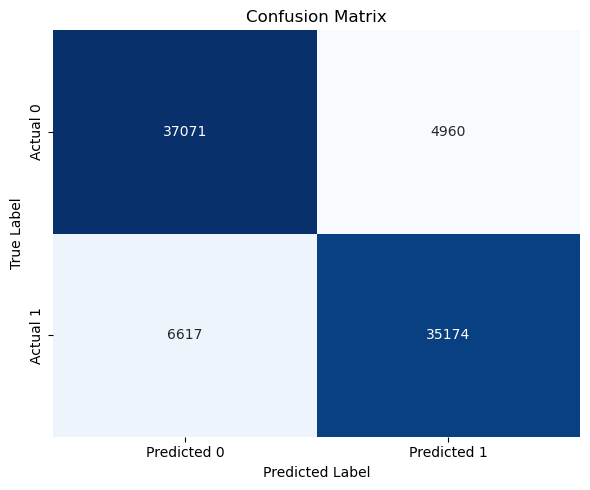

In [310]:
cm_ada = confusion_matrix(y_test, ada_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [311]:
# 6. Extra Trees
print("\nTraining Extra Trees...")
param_grid_et = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
et = ExtraTreesClassifier(n_estimators=200, random_state=42)
grid_et = GridSearchCV(et, param_grid_et, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_et.fit(x_train_sample, y_train_sample)

et_model = ExtraTreesClassifier(n_estimators=200, random_state=42, **grid_et.best_params_)
et_model.fit(x_train_pca, y_train)
et_pred = et_model.predict(x_test_pca)
et_accuracy = accuracy_score(y_test, et_pred)
model_results['Extra Trees'] = et_accuracy
print(f"Extra Trees Accuracy: {et_accuracy:.4f}")


Training Extra Trees...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/binaypandey/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Extra Trees Accuracy: 0.8767


In [312]:
et_pred_proba = et_model.predict_proba(x_test_pca)[:, 1]

In [313]:
et_precision = precision_score(y_test, et_pred)
et_recall = recall_score(y_test, et_pred)
et_f1 = f1_score(y_test, et_pred)
et_auc = roc_auc_score(y_test, et_pred_proba)
model_results['Extra Trees'] = et_accuracy
model_precision['Extra Trees'] = et_precision
model_recall['Extra Trees'] = et_recall
model_f1['Extra Trees'] = et_f1
model_auc['Extra Trees'] = et_auc

In [314]:
print("classification_report: \n",classification_report(y_test, et_pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     42031
           1       0.89      0.86      0.87     41791

    accuracy                           0.88     83822
   macro avg       0.88      0.88      0.88     83822
weighted avg       0.88      0.88      0.88     83822



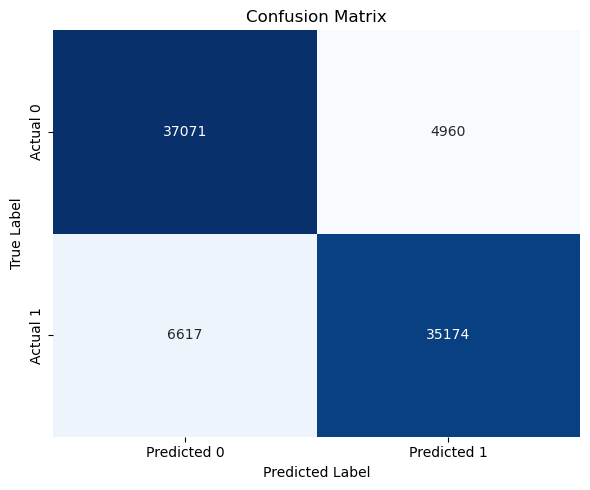

In [315]:
cm_et = confusion_matrix(y_test, et_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


RandomForest Results:
Accuracy: 0.8619
AUC-ROC: 0.9329
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     42031
           1       0.88      0.84      0.86     41791

    accuracy                           0.86     83822
   macro avg       0.86      0.86      0.86     83822
weighted avg       0.86      0.86      0.86     83822



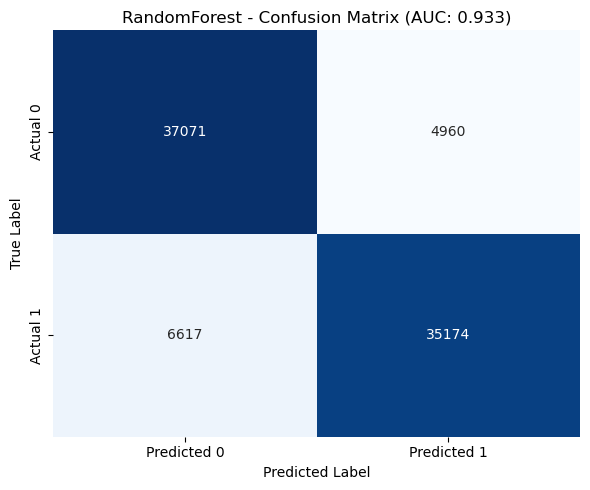


XGBoost Results:
Accuracy: 0.8543
AUC-ROC: 0.9267
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     42031
           1       0.87      0.83      0.85     41791

    accuracy                           0.85     83822
   macro avg       0.86      0.85      0.85     83822
weighted avg       0.86      0.85      0.85     83822



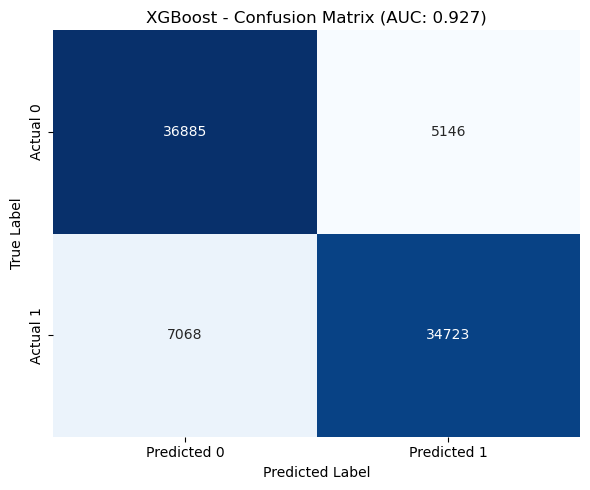


LightGBM Results:
Accuracy: 0.8574
AUC-ROC: 0.9295
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     42031
           1       0.87      0.83      0.85     41791

    accuracy                           0.86     83822
   macro avg       0.86      0.86      0.86     83822
weighted avg       0.86      0.86      0.86     83822



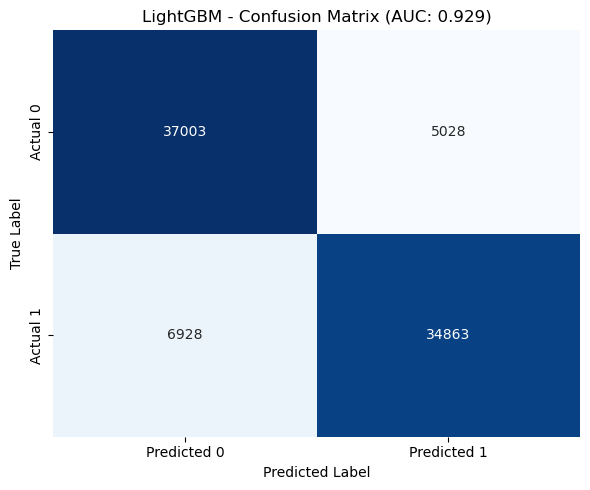


Gradient Boosting Results:
Accuracy: 0.8555
AUC-ROC: 0.9282
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     42031
           1       0.87      0.83      0.85     41791

    accuracy                           0.86     83822
   macro avg       0.86      0.86      0.86     83822
weighted avg       0.86      0.86      0.86     83822



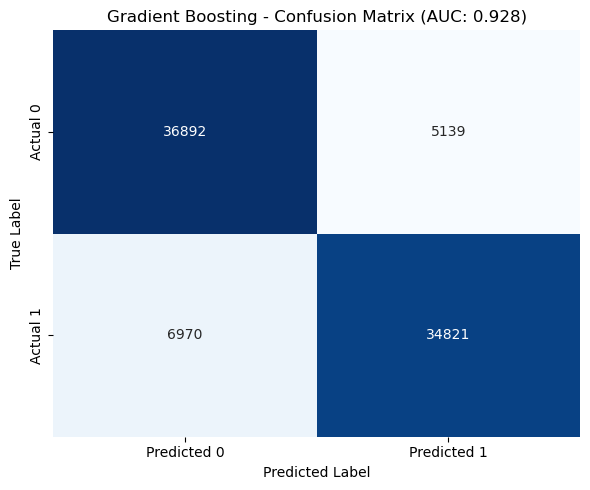


AdaBoost Results:
Accuracy: 0.8478
AUC-ROC: 0.9210
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     42031
           1       0.85      0.84      0.85     41791

    accuracy                           0.85     83822
   macro avg       0.85      0.85      0.85     83822
weighted avg       0.85      0.85      0.85     83822



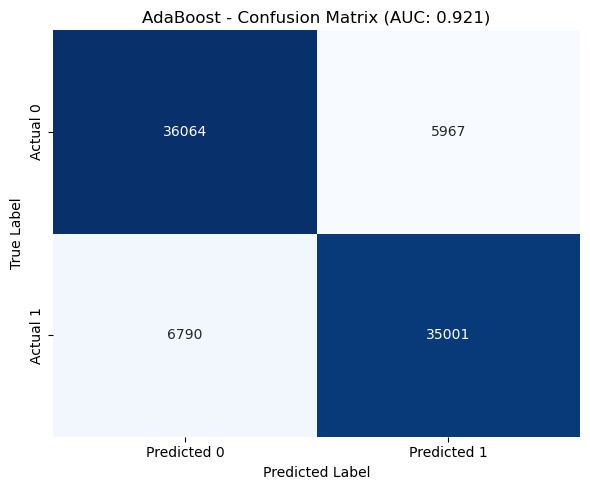


Extra Trees Results:
Accuracy: 0.8767
AUC-ROC: 0.9421
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     42031
           1       0.89      0.86      0.87     41791

    accuracy                           0.88     83822
   macro avg       0.88      0.88      0.88     83822
weighted avg       0.88      0.88      0.88     83822



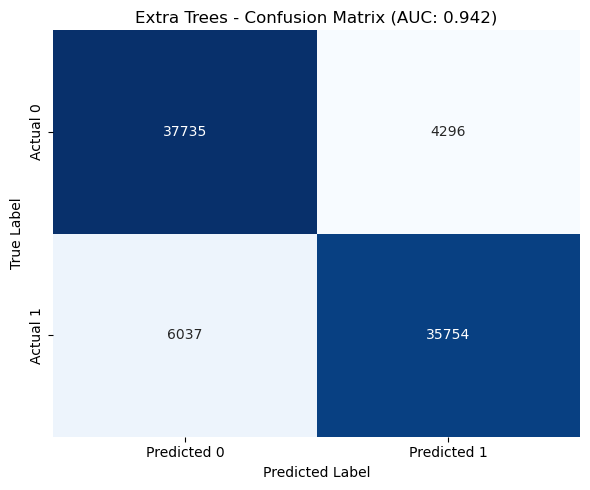


MODEL COMPARISON


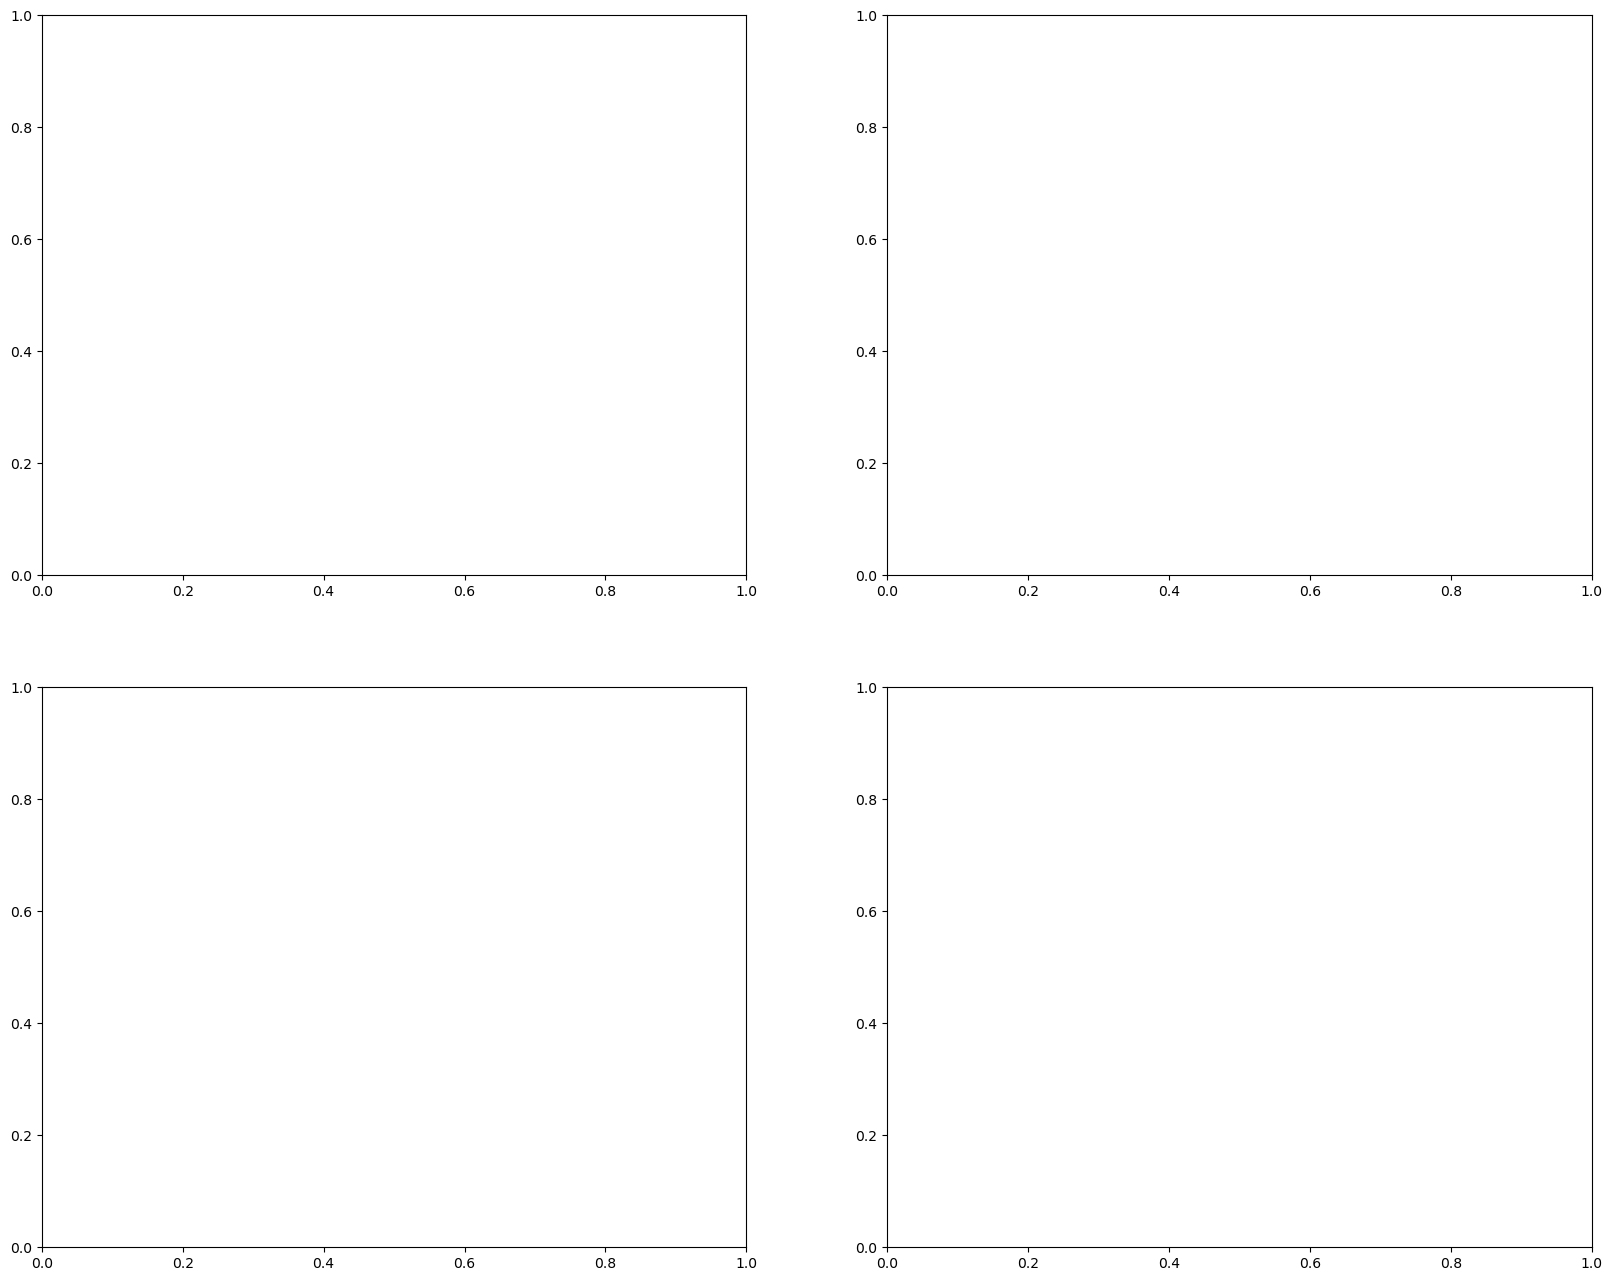

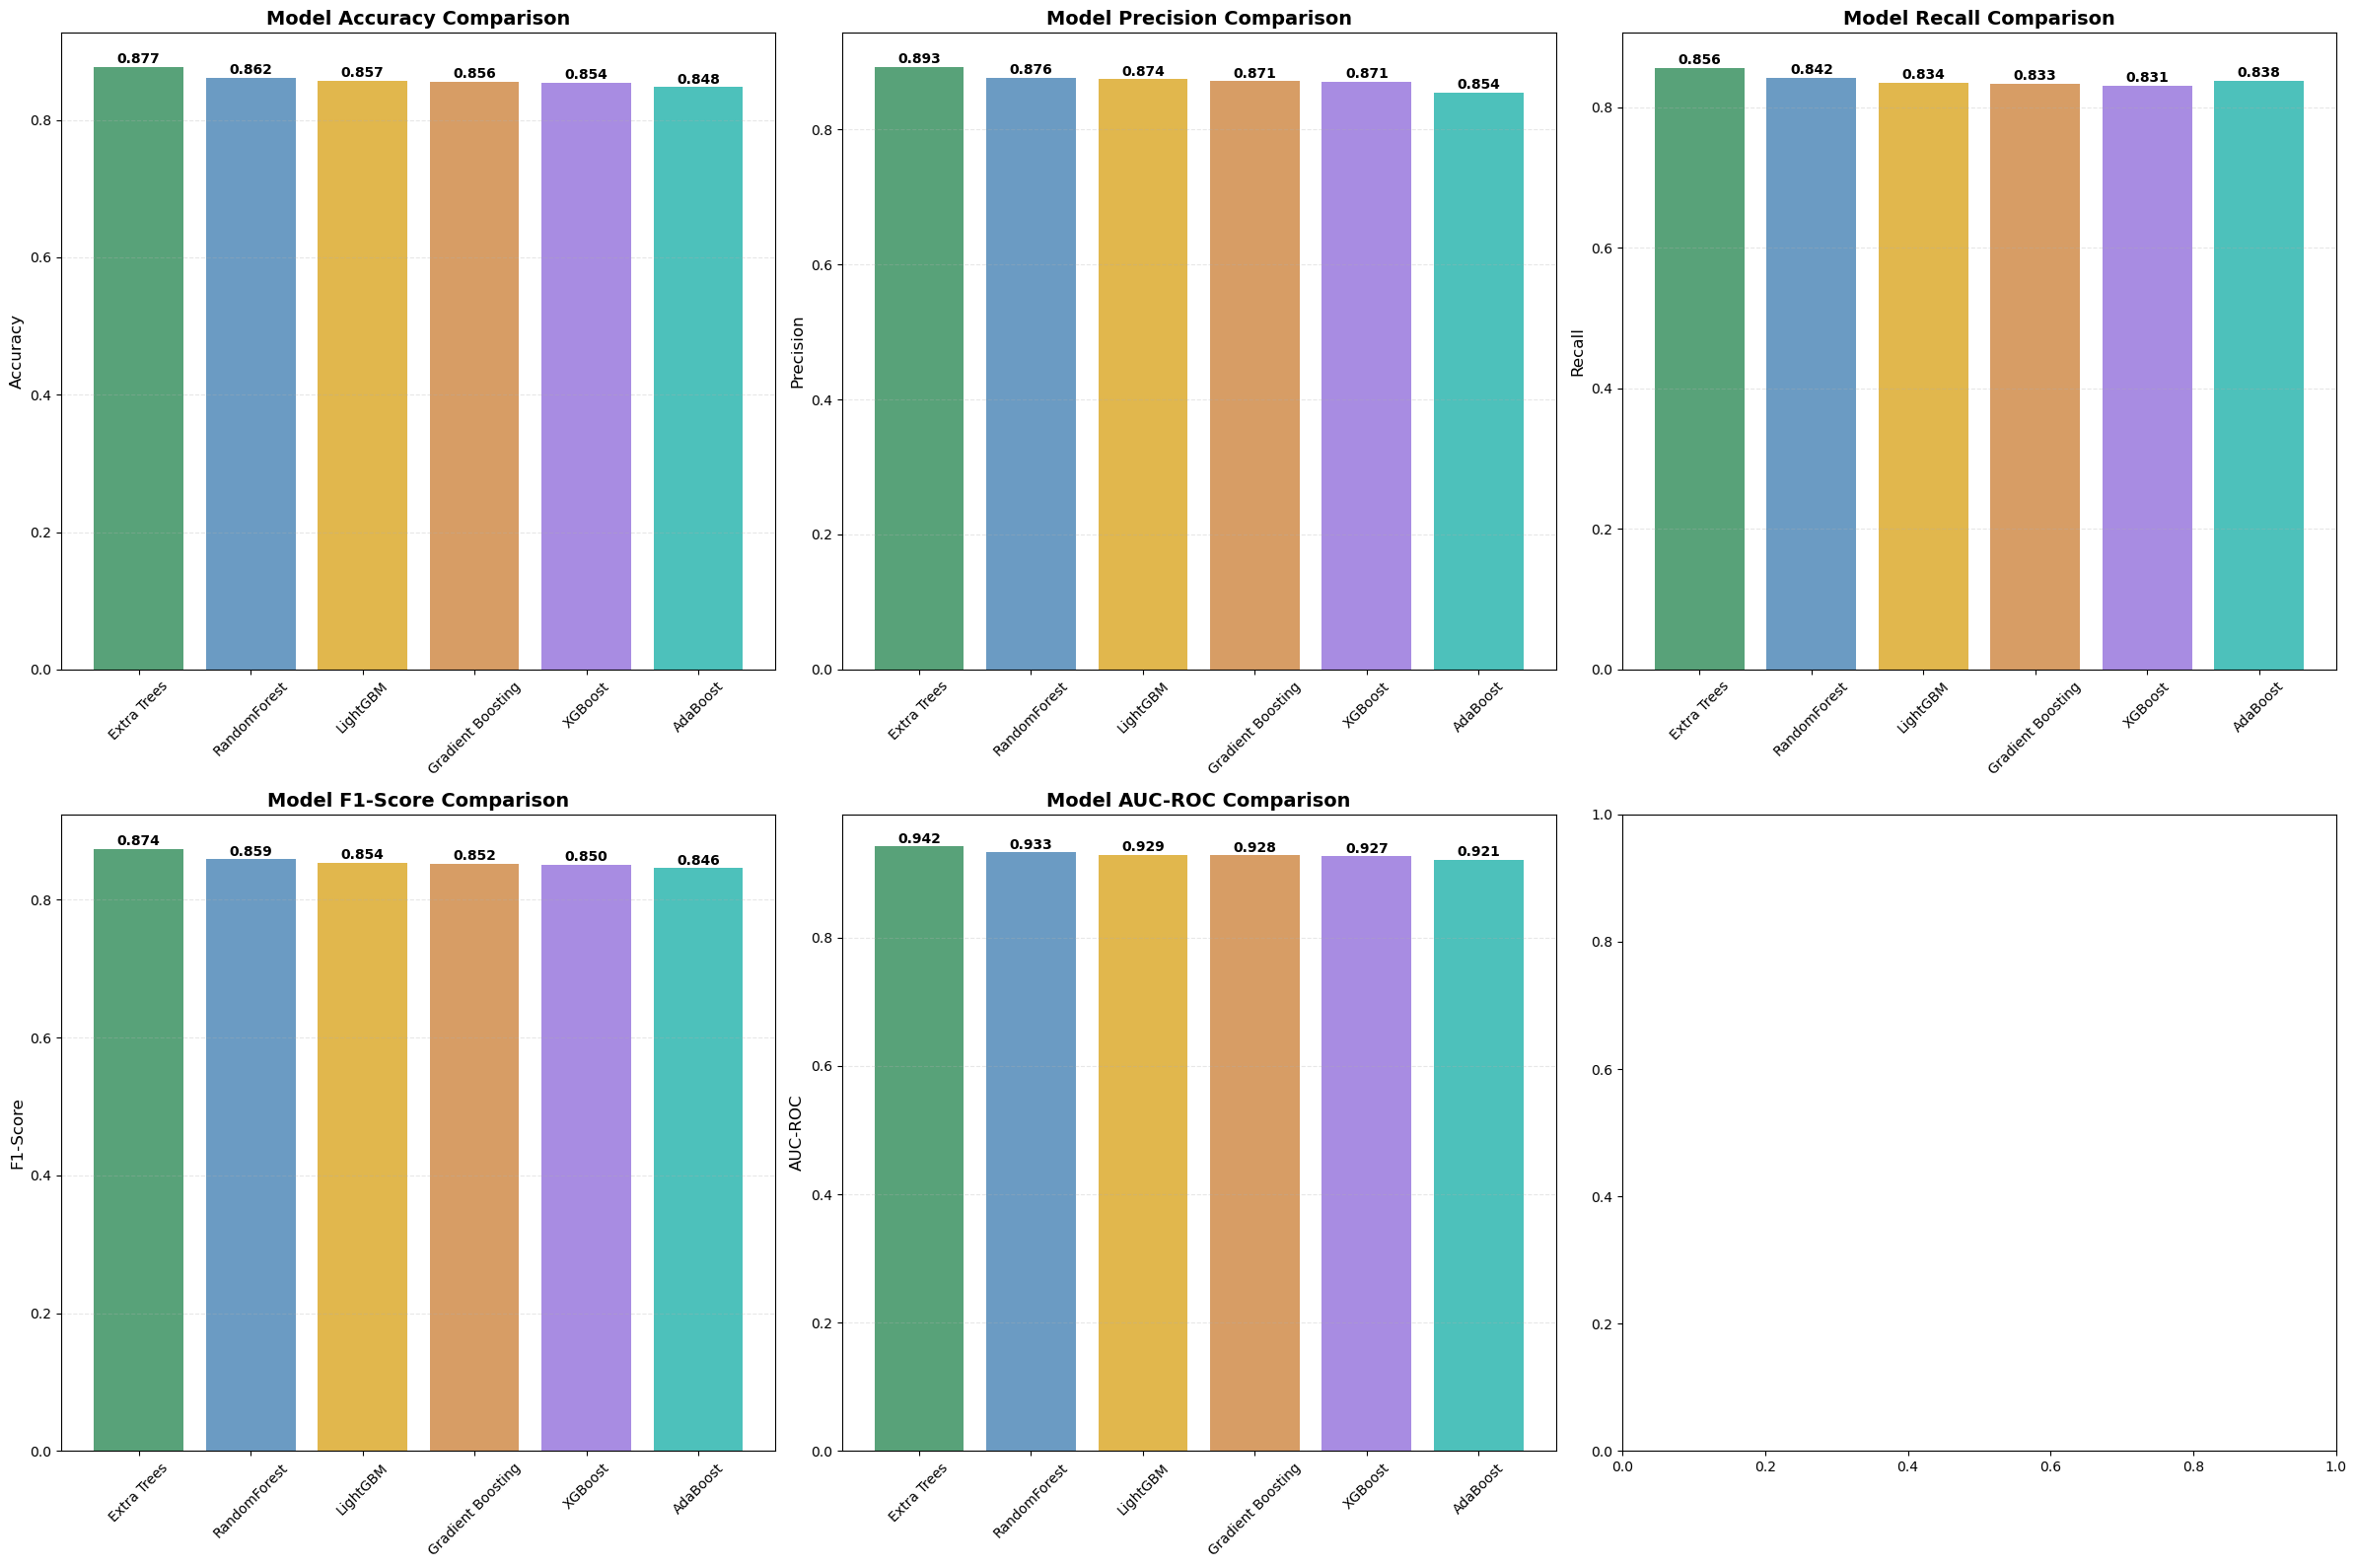

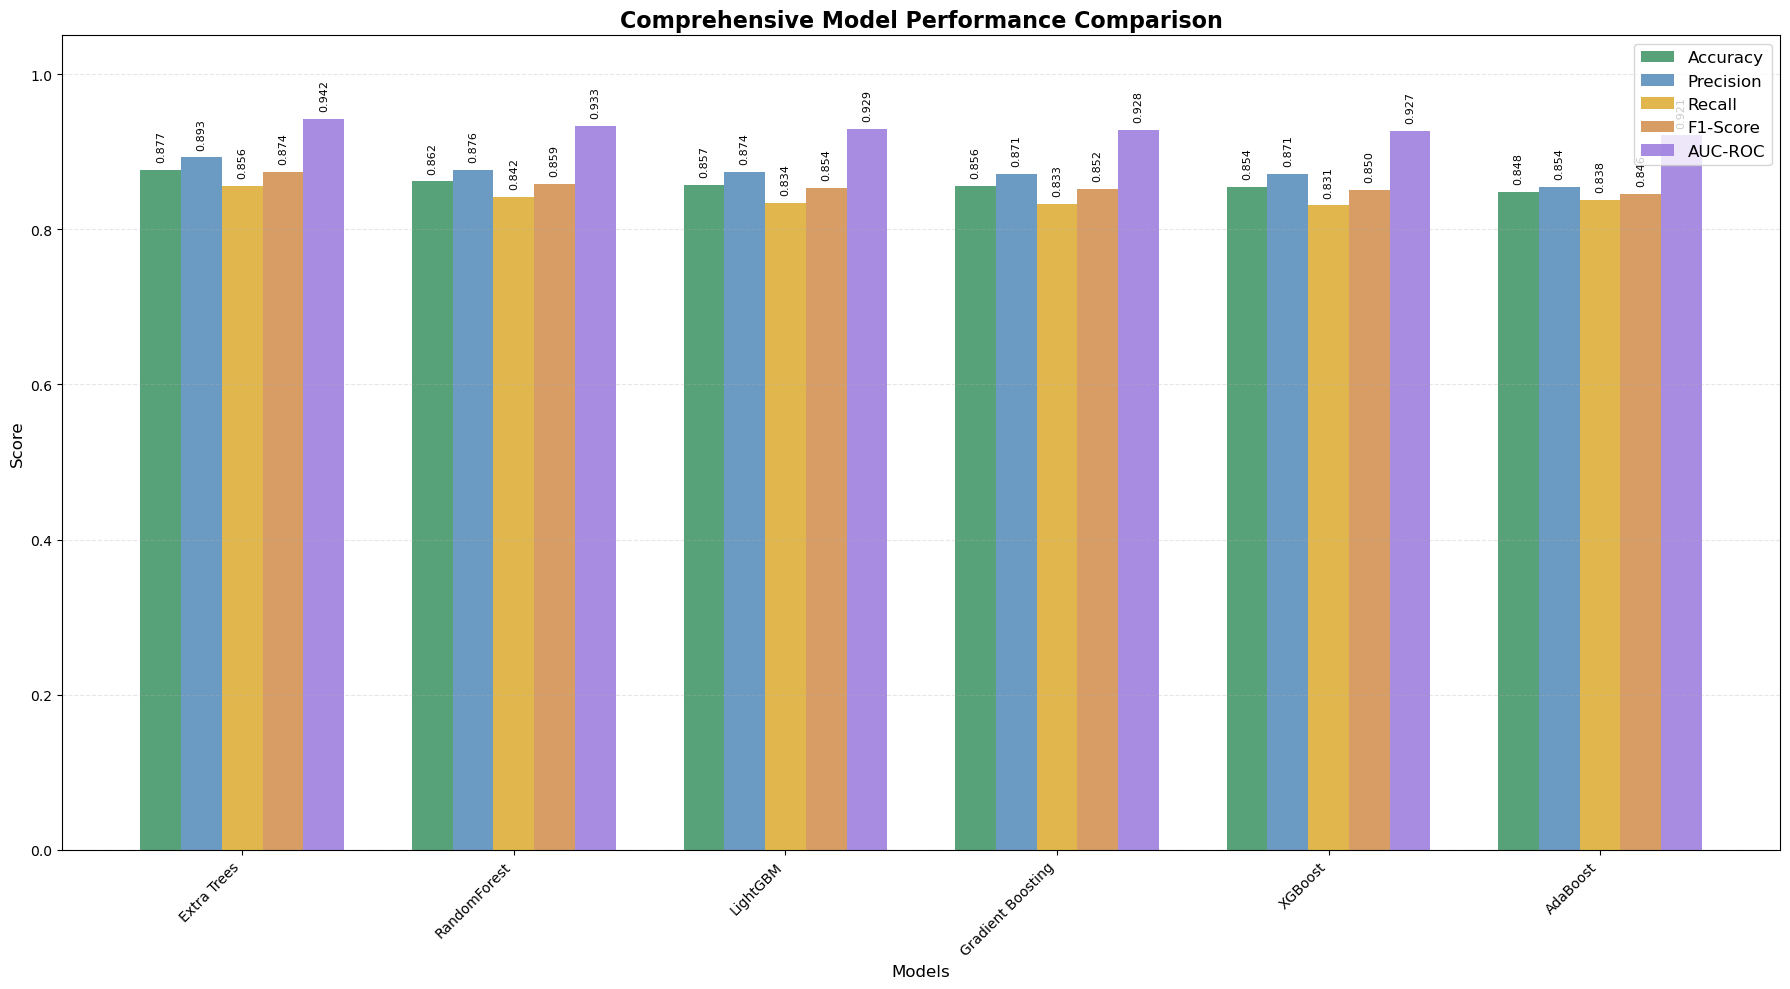

In [366]:
models_data = {
    'RandomForest': (y_pred, rf_model, rf_pred_proba),
    'XGBoost': (xgb_pred, xgb_model, xgb_pred_proba),
    'LightGBM': (lgb_pred, lgb_model, lgb_pred_proba),
    'Gradient Boosting': (gb_pred, gb_model, gb_pred_proba),
    'AdaBoost': (ada_pred, ada_model, ada_pred_proba),
    'Extra Trees': (et_pred, et_model, et_pred_proba)
}

for name, (pred, model, pred_proba) in models_data.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, pred_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{name} - Confusion Matrix (AUC: {roc_auc_score(y_test, pred_proba):.3f})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Model Comparison Plot
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

# Sort models by accuracy
sorted_results = dict(sorted(model_results.items(), key=lambda x: x[1], reverse=True))

# Create comprehensive comparison plots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

models = list(sorted_results.keys())
accuracies = [model_results[model] for model in models]
precisions = [model_precision[model] for model in models]
recalls = [model_recall[model] for model in models]
f1_scores = [model_f1[model] for model in models]
auc_scores = [model_auc[model] for model in models]

colors = ['#2E8B57', '#4682B4', '#DAA520', '#CD853F', '#9370DB', '#20B2AA']

# Create comprehensive comparison plots
fig, axes = plt.subplots(2, 3, figsize=(24, 16))

# Accuracy Plot
bars1 = axes[0,0].bar(models, accuracies, color=colors, alpha=0.8)
axes[0,0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Accuracy', fontsize=12)
axes[0,0].set_ylim(0, max(accuracies) + 0.05)
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', alpha=0.3, linestyle='--')
for i, acc in enumerate(accuracies):
    axes[0,0].text(i, acc + 0.001, f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Precision Plot
bars2 = axes[0,1].bar(models, precisions, color=colors, alpha=0.8)
axes[0,1].set_title('Model Precision Comparison', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Precision', fontsize=12)
axes[0,1].set_ylim(0, max(precisions) + 0.05)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(axis='y', alpha=0.3, linestyle='--')
for i, prec in enumerate(precisions):
    axes[0,1].text(i, prec + 0.001, f'{prec:.3f}', ha='center', va='bottom', fontweight='bold')

# Recall Plot
bars3 = axes[0,2].bar(models, recalls, color=colors, alpha=0.8)
axes[0,2].set_title('Model Recall Comparison', fontsize=14, fontweight='bold')
axes[0,2].set_ylabel('Recall', fontsize=12)
axes[0,2].set_ylim(0, max(recalls) + 0.05)
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].grid(axis='y', alpha=0.3, linestyle='--')
for i, rec in enumerate(recalls):
    axes[0,2].text(i, rec + 0.001, f'{rec:.3f}', ha='center', va='bottom', fontweight='bold')

# F1-Score Plot
bars4 = axes[1,0].bar(models, f1_scores, color=colors, alpha=0.8)
axes[1,0].set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('F1-Score', fontsize=12)
axes[1,0].set_ylim(0, max(f1_scores) + 0.05)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(axis='y', alpha=0.3, linestyle='--')
for i, f1 in enumerate(f1_scores):
    axes[1,0].text(i, f1 + 0.001, f'{f1:.3f}', ha='center', va='bottom', fontweight='bold')

# AUC-ROC Plot
bars5 = axes[1,1].bar(models, auc_scores, color=colors, alpha=0.8)
axes[1,1].set_title('Model AUC-ROC Comparison', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('AUC-ROC', fontsize=12)
axes[1,1].set_ylim(0, max(auc_scores) + 0.05)
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(axis='y', alpha=0.3, linestyle='--')
for i, auc in enumerate(auc_scores):
    axes[1,1].text(i, auc + 0.001, f'{auc:.3f}', ha='center', va='bottom', fontweight='bold')

# Training Time Plot (converted to log scale for better visualization)
#training_times = [178.31, 14.57, 18.38, 270.94, 58.93, 128.68]  # From your original results
#bars6 = axes[1,2].bar(models, training_times, color=colors, alpha=0.8)
#axes[1,2].set_title('Model Training Time Comparison', fontsize=14, fontweight='bold')
#axes[1,2].set_ylabel('Training Time (seconds)', fontsize=12)
#axes[1,2].set_yscale('log')
#axes[1,2].tick_params(axis='x', rotation=45)
#axes[1,2].grid(axis='y', alpha=0.3, linestyle='--')
#for i, time in enumerate(training_times):
#    axes[1,2].text(i, time + time*0.1, f'{time:.1f}s', ha='center', va='bottom', fontweight='bold')

#plt.tight_layout()
#plt.show()

plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()

# Combined Metrics Plot
plt.figure(figsize=(18, 10))
x = np.arange(len(models))
width = 0.15

plt.bar(x - 2*width, accuracies, width, label='Accuracy', alpha=0.8, color='#2E8B57')
plt.bar(x - width, precisions, width, label='Precision', alpha=0.8, color='#4682B4')
plt.bar(x, recalls, width, label='Recall', alpha=0.8, color='#DAA520')
plt.bar(x + width, f1_scores, width, label='F1-Score', alpha=0.8, color='#CD853F')
plt.bar(x + 2*width, auc_scores, width, label='AUC-ROC', alpha=0.8, color='#9370DB')

plt.title('Comprehensive Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(x, models, rotation=45, ha='right')
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, 1.05)

# Add value labels on bars
for i in range(len(models)):
    plt.text(i - 2*width, accuracies[i] + 0.01, f'{accuracies[i]:.3f}', ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i - width, precisions[i] + 0.01, f'{precisions[i]:.3f}', ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i, recalls[i] + 0.01, f'{recalls[i]:.3f}', ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i + width, f1_scores[i] + 0.01, f'{f1_scores[i]:.3f}', ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i + 2*width, auc_scores[i] + 0.01, f'{auc_scores[i]:.3f}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.savefig("comprehansive_model_comparison.png")
plt.show()

In [317]:
# Print final ranking
print("\nModel Ranking (by Precision):")
for i, (model, acc) in enumerate(sorted_results.items(), 1):
    print(f"{i}. {model}: {acc:.4f}")

# Best model summary
best_model = max(model_results, key=model_results.get)
print(f"\nBest performing model: {best_model} with accuracy: {model_results[best_model]:.4f}")

# Save the best model
if best_model == 'Random Forest':
    joblib.dump(rf_model, 'best_loan_default_model.pkl')
elif best_model == 'XGBoost':
    joblib.dump(xgb_model, 'best_loan_default_model.pkl')
elif best_model == 'LightGBM':
    joblib.dump(lgb_model, 'best_loan_default_model.pkl')
elif best_model == 'Gradient Boosting':
    joblib.dump(gb_model, 'best_loan_default_model.pkl')
elif best_model == 'AdaBoost':
    joblib.dump(ada_model, 'best_loan_default_model.pkl')
elif best_model == 'Extra Trees':
    joblib.dump(et_model, 'best_loan_default_model.pkl')

joblib.dump(sc, 'scaler.pkl')
joblib.dump(pca, 'pca_transformer.pkl')

print(f"\nBest model saved as 'best_loan_default_model.pkl'")
print("Scaler saved as 'scaler.pkl'")
print("PCA transformer saved as 'pca_transformer.pkl'")


Model Ranking (by Precision):
1. Extra Trees: 0.8767
2. RandomForest: 0.8619
3. LightGBM: 0.8574
4. Gradient Boosting: 0.8555
5. XGBoost: 0.8543
6. AdaBoost: 0.8478

Best performing model: Extra Trees with accuracy: 0.8767

Best model saved as 'best_loan_default_model.pkl'
Scaler saved as 'scaler.pkl'
PCA transformer saved as 'pca_transformer.pkl'


In [368]:
accuracies

[0.8767268736131326,
 0.8618859010760898,
 0.8573644150700294,
 0.8555391186084799,
 0.8542864641740832,
 0.8478084512419174]

In [370]:
precisions

[0.8927340823970037,
 0.8764140130562615,
 0.8739565315484695,
 0.8713963963963964,
 0.8709272868644812,
 0.8543497363796133]

In [372]:
recalls

[0.8555430595104209,
 0.8416644732119356,
 0.8342226795242995,
 0.8332176784475126,
 0.8308726759350099,
 0.8375248259194563]

In [374]:
f1_scores

[0.873742989455163,
 0.8586878242294782,
 0.8536274821870179,
 0.8518794877126885,
 0.8504286064168504,
 0.8458536231708939]

In [376]:
auc_scores

[0.9420979740970087,
 0.9329140503347133,
 0.9294961049238517,
 0.9281952149681972,
 0.9266684140863746,
 0.9209837346677967]

In [378]:
models

['Extra Trees',
 'RandomForest',
 'LightGBM',
 'Gradient Boosting',
 'XGBoost',
 'AdaBoost']